In [8]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 5

In [6]:
celine_vse = pd.read_csv('celine.csv', index_col = "Country Code")
celine_vse.head()

,Domain Code,Domain,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Country Code,,,,,,,,,,,,,
5100,QC,Crops,Africa,5312,Area harvested,406,Garlic,1964,1964,Ha,7190.0,A,"Aggregate, may include official, semi-official..."
5100,QC,Crops,Africa,5419,Yield,406,Garlic,1964,1964,Hg/Ha,103451.0,Fc,Calculated data
5100,QC,Crops,Africa,5510,Production,406,Garlic,1964,1964,tonnes,74381.0,A,"Aggregate, may include official, semi-official..."
5200,QC,Crops,Americas,5312,Area harvested,406,Garlic,1964,1964,Ha,38601.0,A,"Aggregate, may include official, semi-official..."
5200,QC,Crops,Americas,5419,Yield,406,Garlic,1964,1964,Hg/Ha,37839.0,Fc,Calculated data


In [10]:
celine = celine_vse.drop(["Domain Code", "Domain", "Element Code", "Year Code", "Item", "Item Code", "Unit", "Flag Description"], axis = 1)
celine
#pridelek = celine[celine["Element"] == "Yield"]
#pridelek
#povrsina = celine[celine["Element" == "Area harvested"]]

,Country,Element,Year,Value,Flag
Country Code,,,,,
5100,Africa,Area harvested,1964,7190.0,A
5100,Africa,Yield,1964,103451.0,Fc
...,...,...,...,...,...
5100,Africa,Yield,2013,112039.0,Fc
5100,Africa,Area harvested,2013,57237.0,A


In [12]:
drzave = celine['Country']
drzave
for drzava in set(drzave):
    print(drzava)
# koda = celine['Country Code']
# koda

Americas
Africa
Europe
Asia


In [13]:
drzave = celine.groupby(['Country'])
drzave["Value"].sum()
drzave["Value"].mean()
drzave.count()

,Element,Year,Value,Flag
Country,,,,
Africa,150,150,150,150
Americas,200,200,200,200
Asia,200,200,200,200
Europe,150,150,150,150


In [57]:
is_yield = celine["Element"] == "Yield"
pridelek = celine[is_yield]
pridelek["Country"].value_counts()

Africa      50
Europe      50
Asia        50
Americas    50
Name: Country, dtype: int64

In [58]:
cel = celine[["Country", "Element", "Year", "Value"]]
cel = cel[is_yield]
cel.count()

Country    200
Element    200
Year       200
Value      200
dtype: int64

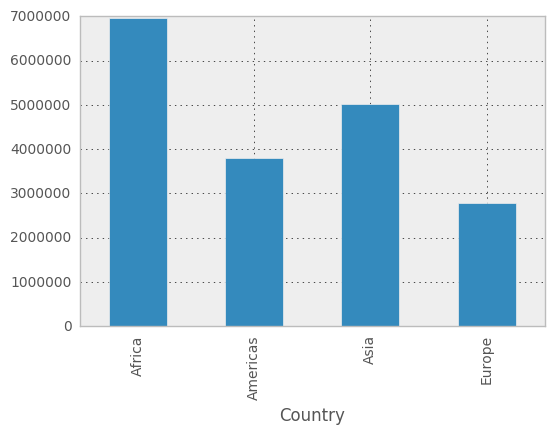

In [59]:
vsota_celine = cel.groupby("Country")["Value"].aggregate(sum)
vsota_celine.plot(kind = "bar")


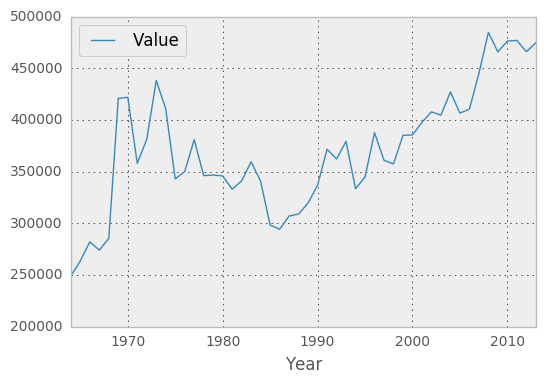

In [60]:
cel.groupby("Year").aggregate(sum).plot()

In [64]:
po_letih = celine.groupby("Year")

In [67]:
po_letih.count()

,Country,Element,Value,Flag
Year,,,,
1964,14,14,14,14
1965,14,14,14,14
...,...,...,...,...
2012,14,14,14,14
2013,14,14,14,14
